# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt

now = dt.datetime.today()
strformat = now.strftime("%Y-%m-%d")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(now)

2019-04-16 18:35:36.795192


## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

453

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
print("Beginning Data Retrieval")
print("-----------------------------")

weather_response_json = []

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_list = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

for city in range(len(cities)):
    
    print(f"Processing Record {city} | {cities[city]}")
    
    query_url = f"{url}appid={api_key}&units={units}&q={cities[city]}"
    response = requests.get(query_url)
    weather_response = response.json()
    weather_response_json.append(weather_response)
    
    try:
        city_list.append(weather_response['name'])
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        pass
    


Beginning Data Retrieval
-----------------------------
Processing Record 0 | rikitea
Processing Record 1 | punta arenas
Processing Record 2 | atambua
Processing Record 3 | yellowknife
Processing Record 4 | vaini
Processing Record 5 | los llanos de aridane
Processing Record 6 | tromso
Processing Record 7 | arraial do cabo
Processing Record 8 | carnarvon
Processing Record 9 | busselton
Processing Record 10 | hamilton
Processing Record 11 | anadyr
Processing Record 12 | hithadhoo
Processing Record 13 | puerto madryn
Processing Record 14 | acari
Processing Record 15 | seoul
Processing Record 16 | atuona
Processing Record 17 | shingu
Processing Record 18 | bredasdorp
Processing Record 19 | vila velha
Processing Record 20 | touros
Processing Record 21 | qasigiannguit
Processing Record 22 | codo
Processing Record 23 | fuling
Processing Record 24 | walvis bay
Processing Record 25 | puerto ayora
Processing Record 26 | port lincoln
Processing Record 27 | saint-pierre
Processing Record 28 | hay r

Processing Record 225 | cidreira
Processing Record 226 | riyadh
Processing Record 227 | saleaula
Missing field/result... skipping.
Processing Record 228 | bilara
Processing Record 229 | rocha
Processing Record 230 | tapaua
Missing field/result... skipping.
Processing Record 231 | mrirt
Missing field/result... skipping.
Processing Record 232 | paracatu
Processing Record 233 | gizo
Processing Record 234 | inirida
Processing Record 235 | arys
Processing Record 236 | kaduqli
Processing Record 237 | la asuncion
Processing Record 238 | bambanglipuro
Processing Record 239 | guerrero negro
Processing Record 240 | skagastrond
Missing field/result... skipping.
Processing Record 241 | kavaratti
Processing Record 242 | vila franca do campo
Processing Record 243 | matagami
Processing Record 244 | trinidad
Processing Record 245 | marsaxlokk
Processing Record 246 | esperance
Processing Record 247 | patnos
Processing Record 248 | namatanai
Processing Record 249 | corner brook
Processing Record 250 | r

Processing Record 445 | san carlos de bariloche
Processing Record 446 | bac lieu
Missing field/result... skipping.
Processing Record 447 | tautira
Processing Record 448 | asosa
Processing Record 449 | naze
Processing Record 450 | isla mujeres
Processing Record 451 | khao wong
Processing Record 452 | selenginsk


In [22]:
weather_response_json

[{'coord': {'lon': -134.97, 'lat': -23.12},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 78.24,
   'pressure': 1013.621,
   'humidity': 80,
   'temp_min': 78.24,
   'temp_max': 78.24,
   'sea_level': 1013.621,
   'grnd_level': 1013.418},
  'wind': {'speed': 9.01, 'deg': 121.695},
  'clouds': {'all': 95},
  'dt': 1555453814,
  'sys': {'message': 0.005,
   'country': 'PF',
   'sunrise': 1555427599,
   'sunset': 1555469135},
  'id': 4030556,
  'name': 'Rikitea',
  'cod': 200},
 {'coord': {'lon': -70.91, 'lat': -53.16},
  'weather': [{'id': 520,
    'main': 'Rain',
    'description': 'light intensity shower rain',
    'icon': '09n'}],
  'base': 'stations',
  'main': {'temp': 39.09,
   'pressure': 987,
   'humidity': 93,
   'temp_min': 39,
   'temp_max': 39.2},
  'visibility': 10000,
  'wind': {'speed': 18.34, 'deg': 260},
  'clouds': {'all': 40},
  'dt': 1555453399,
  'sys': {'type': 1,
 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
print(len(city_list))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(wind_speed))

406
406
406
406
406
406
406
406
406


In [24]:
weather_dict = {
    "City": city_list,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,95,PF,1555453814,80,-23.12,-134.97,78.24,9.01
1,Punta Arenas,40,CL,1555453399,93,-53.16,-70.91,39.20,18.34
2,Atambua,0,ID,1555453815,63,-9.11,124.89,82.16,8.61
3,Yellowknife,90,CA,1555453759,79,62.45,-114.38,28.00,6.93
4,Vaini,0,IN,1555453815,89,15.34,74.49,73.94,2.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

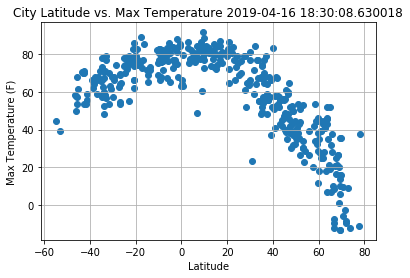

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({now})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Lat_vs_temp.png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

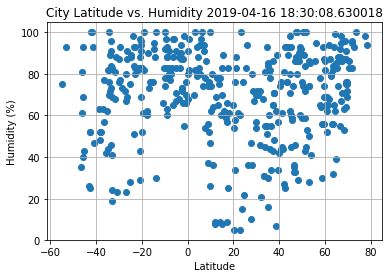

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({now})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

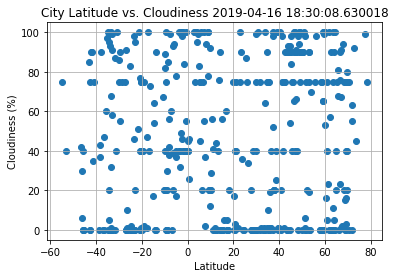

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({now})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

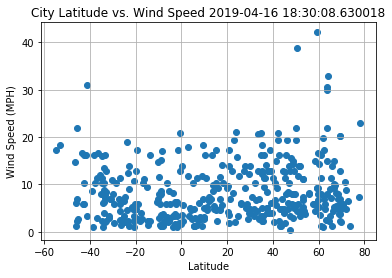

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({now})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/lat_vs_wind.png")

# Show plot
plt.show()